In [27]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from discontinuitypy.core.pipeline import ids_finder
from discontinuitypy.datasets import IDsDataset
from discontinuitypy.utils.basic import resample
import polars as pl
from beforerr.polars import pl_norm

from sunpy.time import TimeRange
from datetime import timedelta
from space_analysis.utils.speasy import Variables

In [29]:
start = '2019-04-06T12:00'
start = '2019-04-07T01:00'
end = '2019-04-07T12:00'

earth_start = '2019-04-09'
earth_end = '2019-04-14'

# tau = timedelta(seconds=60)
tau = timedelta(seconds=10)
ts = timedelta(seconds=1/264)

In [30]:
psp_timerange = TimeRange(start, end)
timerange_earth = TimeRange(earth_start, earth_end)

In [31]:
def validate(timerange):
    if isinstance(timerange, TimeRange):
        return [timerange.start.to_string(), timerange.end.to_string()]

In [32]:
psp_mag_data = Variables(
    dataset="PSP_FLD_L2_MAG_RTN",
    parameters=["psp_fld_l2_mag_RTN"],
    timerange=validate(psp_timerange),
)

In [35]:
psp_ids_dataset = IDsDataset(
    mag_data=psp_mag_data.to_polars(),
    tau=tau,
    ts=ts,
)

In [36]:
psp_ids_dataset.find_events()

06-Feb-24 13:18:59 WARNING  06-Feb-24 13:18:59: UserWarning: Distributing <class                      ]8;id=226847;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=130831;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            'pandas.core.frame.DataFrame'> object. This may take some time.                        
                                                                                                                   

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 1:   0%           Elapsed time: 00:00, estimated remaining time: ?

In [39]:
psp_ids_dataset.export("../data/psp_ids_dataset.parquet")

## Examples of discontinuities observed by PSP

2024-02-06 13:19:15.388 | INFO     | discontinuitypy.datasets:plot_candidates:93 - Candidates indices: [5, 94, 78, 132]


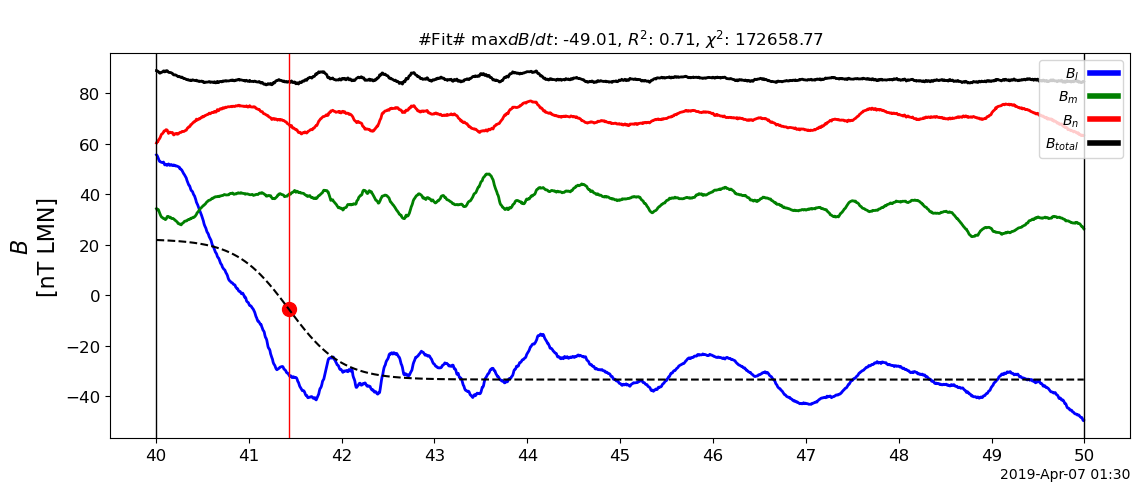

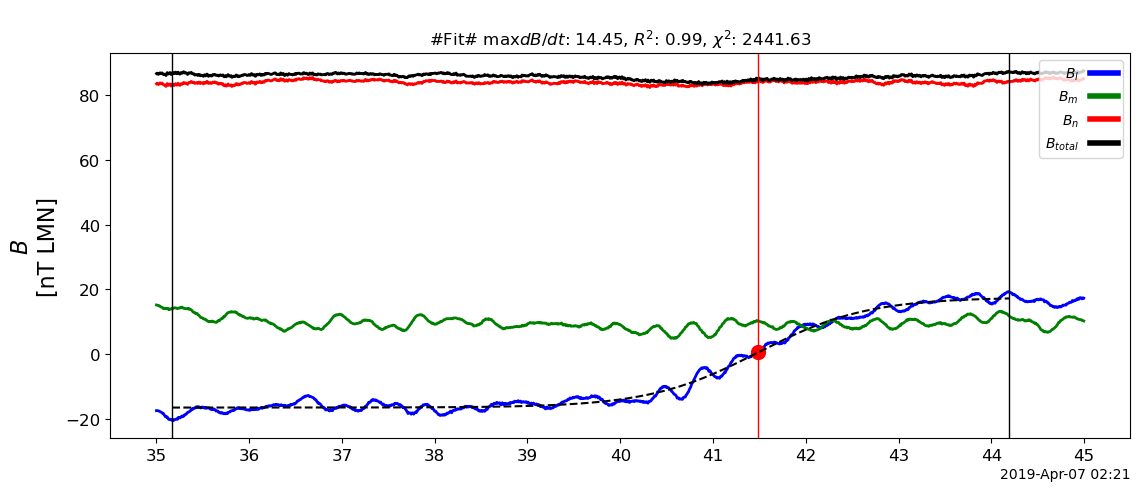

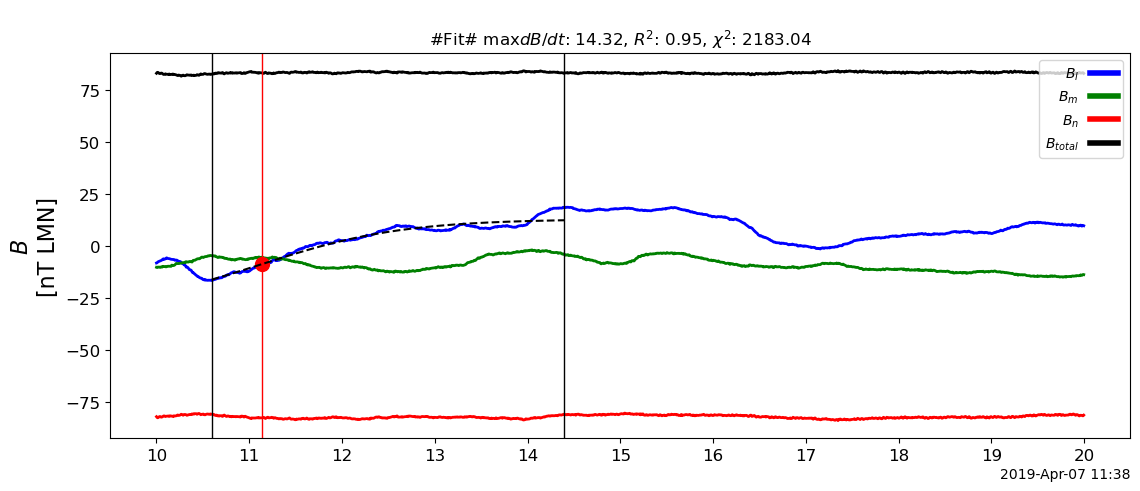

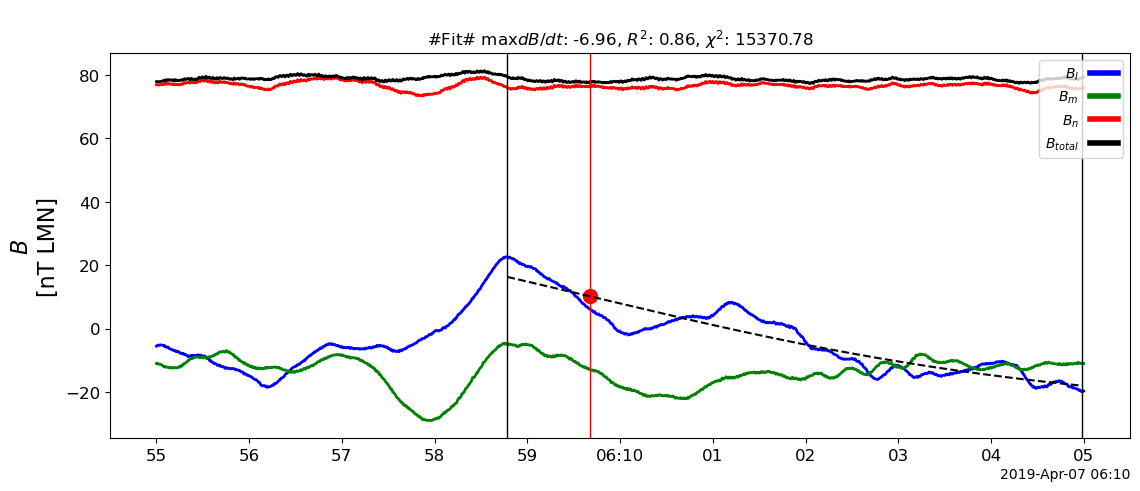

In [37]:
#| column: screen
#| layout-ncol: 3
outs = psp_ids_dataset.plot_candidates(plot_fit_data=True)

## Resampled dataset

By visually inspecting data, the most strong discontinuities kind of have time duration about 1-3 seconds. 
So it is reasonable to downsample the data to a lower frequency so that 

- the detection method is more robust, excluding very high frequency wave/noise?
- it is better to apply the derivative method to get the properties of the discontinuities.
- Match `Wind` time resolution.

Or we could fit the $B_l$ to get the properties of the discontinuities.

In [45]:
every = timedelta(seconds=1/11)
ts = timedelta(seconds=1/11)

data_r = resample(psp_mag_data, every)

In [46]:
candidates_r = ids_finder(data_r, tau, ts)

05-Feb-24 09:56:55 WARNING  05-Feb-24 09:56:55: DeprecationWarning: `pl.count()` is deprecated.       ]8;id=968798;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=919994;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            Please use `pl.len()` instead.                                                         
                                                                                                                   

                   WARNING  05-Feb-24 09:56:55: DeprecationWarning: `map_alias` is deprecated. It has ]8;id=604194;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=25178;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been moved to `name.map`.                                                              
                                                                                                                   

                   WARNING  05-Feb-24 09:56:55: DeprecationWarning: `map_alias` is deprecated. It has ]8;id=391956;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=305197;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been moved to `name.map`.                                                              
                                                                                                                   

                   WARNING  05-Feb-24 09:56:55: UserWarning: Distributing <class                      ]8;id=974418;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=648235;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            'pandas.core.frame.DataFrame'> object. This may take some time.                        
                                                                                                                   

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 1:   0%           Elapsed time: 00:00, estimated remaining time: ?

In [47]:
dataset = "PSP_SWP_SPI_SF00_L3_MOM"
parameters = ["DENS", "VEL_RTN_SUN", "TEMP", "SUN_DIST"]

In [48]:
psp_plasma = Variables(
    dataset=dataset, parameters=parameters, timerange=validate(psp_timerange)
).get_data()

05-Feb-24 09:56:56 WARNING  05-Feb-24 09:56:56: DeprecationWarning: parsing timezone aware datetimes  ]8;id=706008;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=517491;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            is deprecated; this will raise an error in the future                                  
                                                                                                                   

In [49]:
vec_cols = ["Vx RTN", "Vy RTN", "Vz RTN"]

psp_plasma_r = (
    psp_plasma.to_polars()
    .pipe(resample, every=tau)
    .with_columns(plasma_speed=pl_norm(vec_cols))
    .rename(
        {
            "Density": "plasma_density",
            "Temperature": "plasma_temperature",
        }
    )
)

In [52]:
psp_ids_dataset = IDsDataset(
    candidates = candidates_r,
    data = data_r,
    plasma_data = psp_plasma_r,
    vec_cols = vec_cols
)

psp_ids_dataset.update_candidates_with_plasma_data()

05-Feb-24 09:57:13 WARNING  05-Feb-24 09:57:13: PendingDeprecationWarning: The `dims` argument has    ]8;id=495287;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=701389;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been renamed to `dim`, and will be removed in the future. This renaming                
                            is taking place throughout xarray over the next few releases.                          
                                                                                                                   

                   WARNING  05-Feb-24 09:57:13: PendingDeprecationWarning: The `dims` argument has    ]8;id=904989;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=926386;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been renamed to `dim`, and will be removed in the future. This renaming                
                            is taking place throughout xarray over the next few releases.                          
                                                                                                                   

                   WARNING  05-Feb-24 09:57:13: PendingDeprecationWarning: The `dims` argument has    ]8;id=479450;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=48427;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been renamed to `dim`, and will be removed in the future. This renaming                
                            is taking place throughout xarray over the next few releases.                          
                                                                                                                   

                   WARNING  05-Feb-24 09:57:13: DeprecationWarning: `nanoseconds` is deprecated. It   ]8;id=577244;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=202457;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            has been renamed to `total_nanoseconds`.                                               
                                                                                                                   

                   WARNING  05-Feb-24 09:57:13: DeprecationWarning: `nanoseconds` is deprecated. It   ]8;id=107119;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=834709;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            has been renamed to `total_nanoseconds`.                                               
                                                                                                                   

                   WARNING  05-Feb-24 09:57:13: DeprecationWarning: `nanoseconds` is deprecated. It   ]8;id=51709;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=63314;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            has been renamed to `total_nanoseconds`.                                               
                                                                                                                   

In [53]:
def ids_filter(df: pl.DataFrame):
    return df.filter(
        pl.col('index_diff')>1, # interested in strong discontinuities
        pl.col('fit.stat.rsquared')>0.9, # interested in good fits
    )

2024-02-05 09:57:21.134 | INFO     | discontinuitypy.datasets:plot_candidates:67 - Candidates indices: [100, 138, 20, 137]


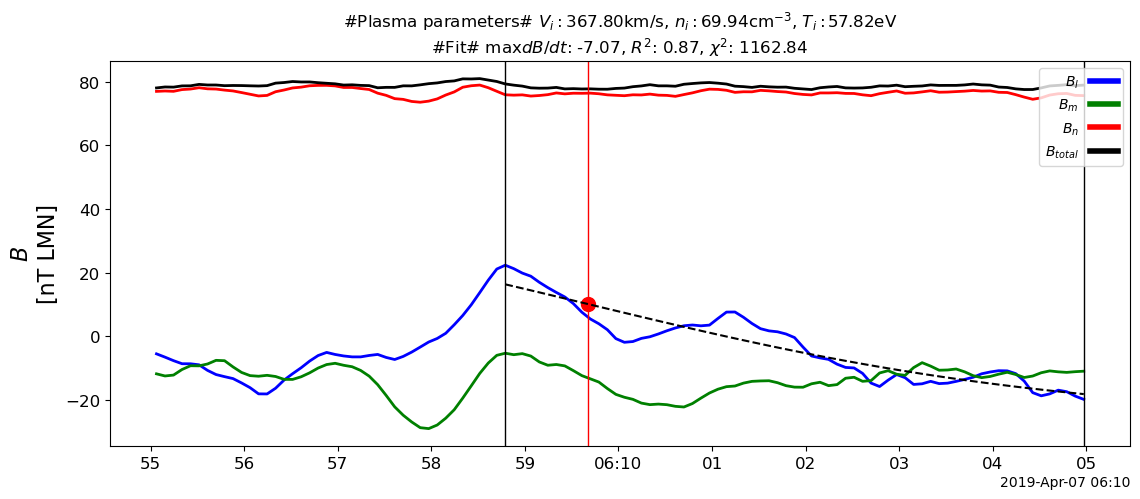

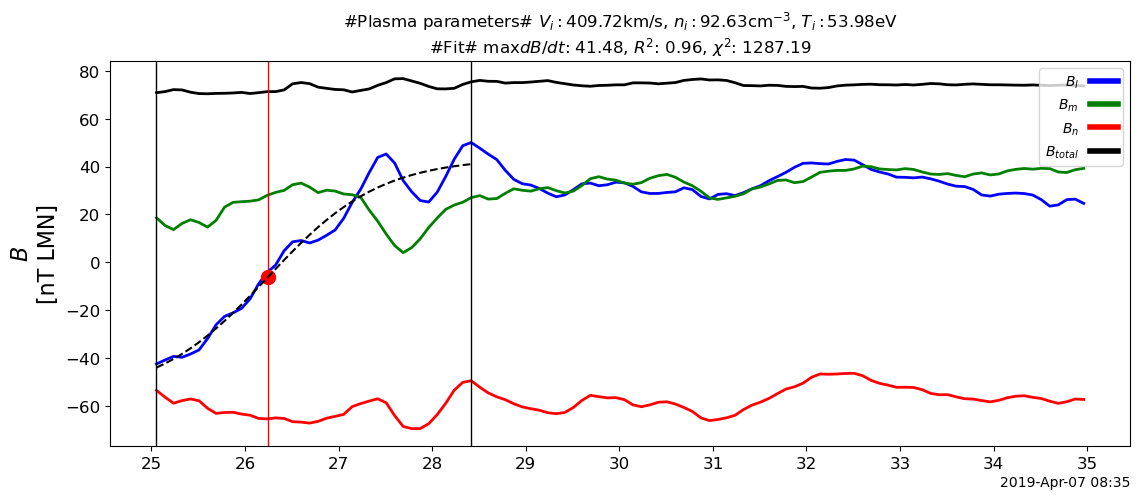

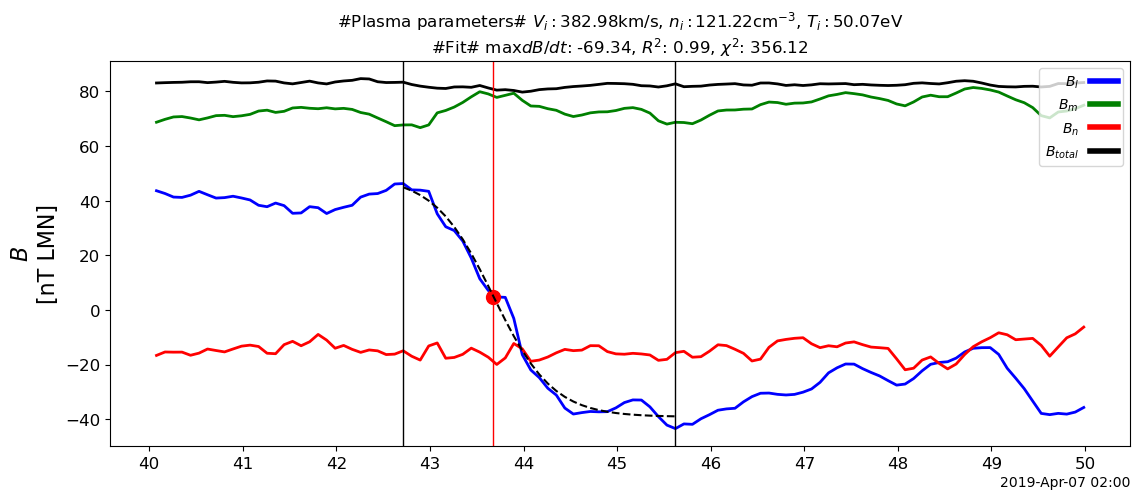

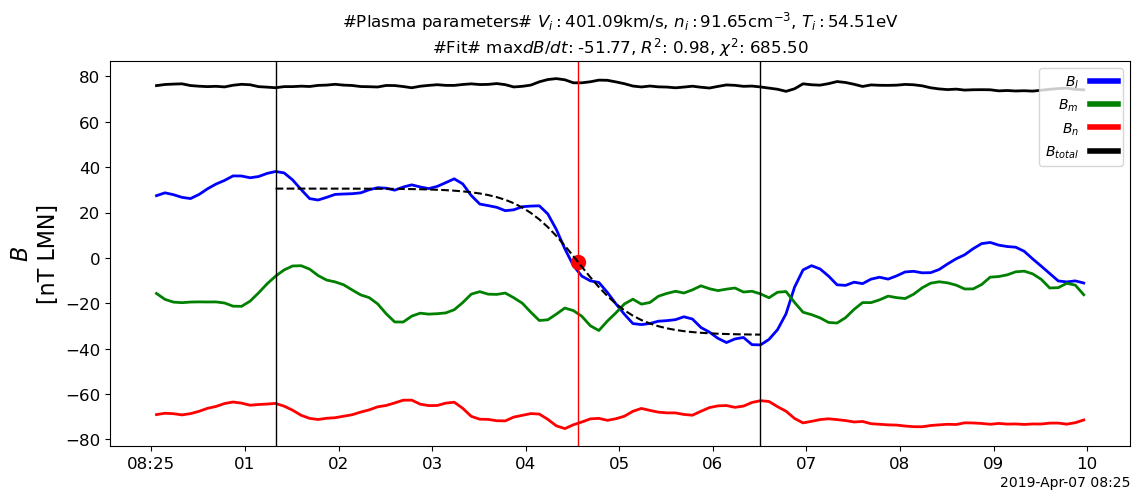

In [55]:
#| column: screen
#| layout-ncol: 3
outs = psp_ids_dataset.plot_candidates(add_plasma_params=True, plot_fit_data=True)